# Лабораторна робота №5: Генерація наборів даних та розв'язання задач класифікації

## Мета:
Оволодіти навичками генерації синтетичних даних, пошуку та попередньої обробки реальних наборів даних, а також побудови та оцінки моделей бінарної класифікації.

**Виконала:** Гульчак Дар'я МІТ-31

## 1. Підготовка бібліотек та функція для моделювання

Ми використовуємо бібліотеки `pandas` та `numpy` для обробки даних, `seaborn` для візуалізації, та `scikit-learn` для створення моделей.

Щоб код був чистим і ми могли легко порівнювати результати різних завдань, створюємо універсальну функцію `run_model`. Вона виконує весь цикл: ділить дані на тренувальну/тестову вибірки, стандартизує їх, навчає логістичну регресію та виводить метрики якості (Accuracy, Precision, Recall, F1).

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

pd.set_option('display.max_columns', None)

def run_model(X, y, dataset_name):
    print(f"\n{'='*20} {dataset_name} {'='*20}")
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled, y_train)
    
    y_pred = model.predict(X_test_scaled)
    
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix: {dataset_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## 2. Завдання 1: Генерація даних (Scikit-Learn)
Використовуємо вбудований генератор make_classification для створення ідеального синтетичного набору даних. Це дозволяє перевірити коректність роботи нашого конвеєра (pipeline) на даних, які гарантовано мають чіткий поділ між класами.


==================== Synthetic Data (Sklearn) ====================
Accuracy: 0.8350

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       112
           1       0.81      0.82      0.81        88

    accuracy                           0.83       200
   macro avg       0.83      0.83      0.83       200
weighted avg       0.84      0.83      0.84       200



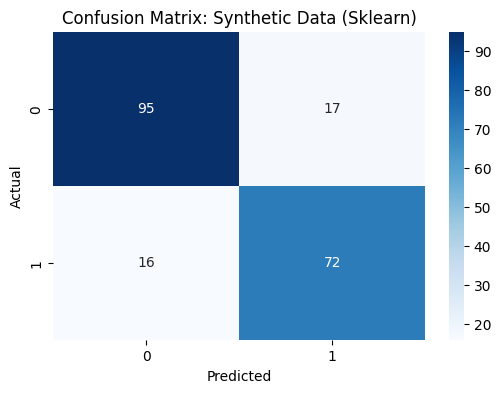

In [7]:
from sklearn.datasets import make_classification

X_synthetic, y_synthetic = make_classification(
    n_samples=1000, 
    n_features=10, 
    n_informative=5, 
    n_classes=2, 
    random_state=42
)

run_model(X_synthetic, y_synthetic, "Synthetic Data (Sklearn)")

## 3. Завдання 2: Робота з реальним датасетом (Heart Disease)
В цьому завданні використовується датасет heart_disease.csv. На відміну від синтетичних даних, реальні дані потребують попередньої обробки. Ми виконуємо:

Завантаження даних.

Видалення пропущених значень (dropna), оскільки модель не вміє працювати з порожніми клітинками.

Кодування категорій (get_dummies), перетворюючи текстові значення ("Yes", "Male") на бінарні (1, 0).


==================== Real Dataset (Heart Disease) ====================
Accuracy: 0.7928

Classification Report:
              precision    recall  f1-score   support

       False       0.79      1.00      0.88      1121
        True       0.00      0.00      0.00       293

    accuracy                           0.79      1414
   macro avg       0.40      0.50      0.44      1414
weighted avg       0.63      0.79      0.70      1414



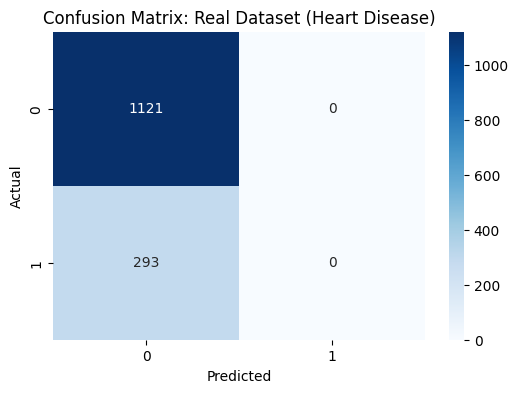

In [8]:
df = pd.read_csv('heart_disease.csv')

df_clean = df.dropna()

df_encoded = pd.get_dummies(df_clean, drop_first=True)

target_col = 'Heart Disease Status_Yes'
X_real = df_encoded.drop(target_col, axis=1)
y_real = df_encoded[target_col]

run_model(X_real, y_real, "Real Dataset (Heart Disease)")

## 4. Завдання 3: Ручна генерація даних (Numpy)
Виконуємо додаткове завдання: генерація даних "з нуля" без використання спеціалізованих функцій sklearn. Ми використовуємо numpy для створення двох кластерів даних із нормальним розподілом, але різними математичними центрами. Це демонструє розуміння статистичної природи класифікації.


==================== Numpy Generated Data ====================
Accuracy: 0.9950

Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        96
         1.0       0.99      1.00      1.00       104

    accuracy                           0.99       200
   macro avg       1.00      0.99      0.99       200
weighted avg       1.00      0.99      0.99       200



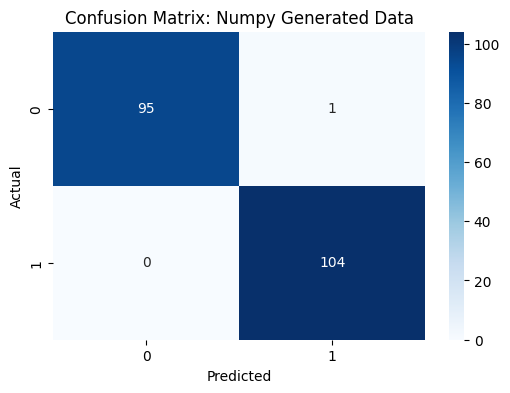

In [9]:
def generate_numpy_data(n_samples=1000):
    np.random.seed(42)
    
    class_0 = np.random.normal(loc=2, scale=1.5, size=(n_samples // 2, 5)) 
    labels_0 = np.zeros(n_samples // 2)
    
    class_1 = np.random.normal(loc=6, scale=1.5, size=(n_samples // 2, 5))
    labels_1 = np.ones(n_samples // 2)
    
    X = np.vstack((class_0, class_1))
    y = np.hstack((labels_0, labels_1))
    
    return X, y

X_numpy, y_numpy = generate_numpy_data()
run_model(X_numpy, y_numpy, "Numpy Generated Data")